# Machine Learning - CAPP 30254
### Andrea L. Koch (12179099)
### Homework 1

##### Worked with predominantly:  Natasha and Saptarshi 
##### (minor work with Cristina, Mario, Loren, Elena, Rose)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, date
from pylab import rcParams
import seaborn as sns
%matplotlib inline

# PROBLEM 1:  Data Acquisition and Analysis

This problem deals with data from the 311 calls in Chicago. Your task is to download
data about 311 requests from the Chicago Open Data Portal and analyze it to better
understand what type of requests come from what (type of) neighborhoods.
You should use Python to do the following tasks.
1. You should download and combine data from the open data portal for 2017
about the following 311 requests: 
    a. Graffiti Removal
    b. Vacant and Abandoned Buildings Reported
    c. Alley Lights Out
2. Generate summary statistics for these requests including but not limited to
number of requests of each type (and subtype within each of the types
above) over time, by neighborhood, response time by the city. Please use a
combination of tables and graphs to present these summary stats.
3. Based on these summary statistics, tell me 5 interesting things you learned
(about Chicago and the different neighborhoods) using the 311 data.

In [2]:
#Read in dataframes
graffiti_df = pd.read_csv('data/311_Service_Requests_-_Graffiti_Removal.csv')
alley_lights_df = pd.read_csv('data/311_Service_Requests_-_Alley_Lights_Out.csv')
vacant_abandoned_buildings_df = pd.read_csv(
    'data/311_Service_Requests_-_Vacant_and_Abandoned_Buildings_Reported.csv')

In [3]:
#Clean the dataframes:

#lowercase all of the column titles
graffiti_df.columns = map(str.lower, graffiti_df.columns)
alley_lights_df.columns = map(str.lower, alley_lights_df.columns)
vacant_abandoned_buildings_df.columns = map(str.lower, 
                                            vacant_abandoned_buildings_df.columns)

#change the column titles (where relevant) in Vacant/Abandoned to match Alley 
#and Graffiti dataframes
vacant_abandoned_buildings_df.rename(columns=
                                     {'service request type':'type of service request'},
                                     inplace=True)
vacant_abandoned_buildings_df.rename(columns=
                                     {'date service request was received':'creation date'},
                                     inplace=True)

vacant_abandoned_buildings_df["street address"] = vacant_abandoned_buildings_df[
    vacant_abandoned_buildings_df.columns[10:14]].apply(lambda x: ' '.join(x.astype(str)),
                                                        axis = 1)

In [4]:
# Concatenate dataframes and include only common columns
acols = set(alley_lights_df.columns)
gcols = set(graffiti_df.columns)
vcols = set(vacant_abandoned_buildings_df.columns)

shared_cols = list(acols.intersection(vcols))

all = [alley_lights_df, graffiti_df, vacant_abandoned_buildings_df]
service_requests_df = pd.concat(all, ignore_index = True)
service_requests_df = service_requests_df[shared_cols]

In [5]:
#convert creation and completion date to datetime objects (for graffiti and alley dfs)
alley_lights_df['creation date'] =  pd.to_datetime(alley_lights_df['creation date'])
alley_lights_df['completion date'] =  pd.to_datetime(alley_lights_df['completion date'])

graffiti_df['creation date'] =  pd.to_datetime(graffiti_df['creation date'])
graffiti_df['completion date'] =  pd.to_datetime(graffiti_df['completion date'])

#calculate response time and add new column (for graffiti and alley dfs)
alley_lights_df['response time in days'] = (alley_lights_df['completion date'] 
                                            - alley_lights_df['creation date']).dt.days
graffiti_df['response time in days'] = (graffiti_df['completion date'] 
                                            - graffiti_df['creation date']).dt.days

In [6]:
#convert creation date to datetime object
service_requests_df['creation date'] =  pd.to_datetime(
                                                service_requests_df['creation date'])

### Count of 311 Requests by Type:

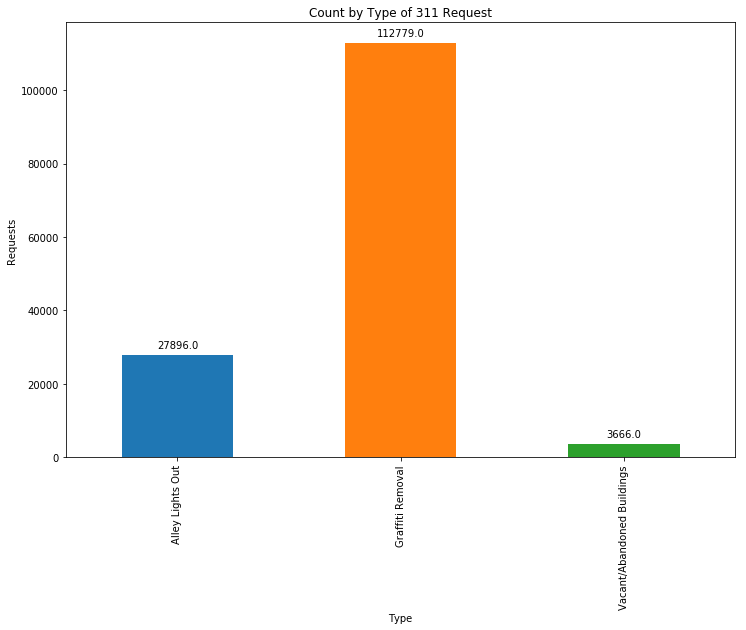

In [7]:
bars = list(service_requests_df.groupby(['type of service request']).size())
bars = pd.Series.from_array(bars)

x_labels = ['Alley Lights Out','Graffiti Removal','Vacant/Abandoned Buildings']

plt.figure(figsize=(12, 8))
ax = bars.plot(kind='bar')
ax.set_title('Count by Type of 311 Request')
ax.set_xlabel('Type')
ax.set_ylabel('Requests')
ax.set_xticklabels(x_labels)

rects = ax.patches

for rect in rects:
    y_value = rect.get_height()
    x_value = rect.get_x() + rect.get_width() / 2

    space = 5
    va = 'bottom'


    label = "{:.1f}".format(y_value)

    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(0, space),          
        textcoords="offset points", 
        ha='center',                
        va=va)                      
                                    

plt.show()

#FROM:  https://stackoverflow.com/questions/28931224/adding-value-labels-on-a-matplotlib
#-bar-chart

### Alley Lights Out - descriptive stats for 'Response Time' (in days):

In [8]:
alley_lights_df['response time in days'].describe()

count    24051.000000
mean        33.489418
std         46.446368
min          0.000000
25%          2.000000
50%         14.000000
75%         48.000000
max        403.000000
Name: response time in days, dtype: float64

### Graffiti Removal - descriptive stats for 'Response Time' (in days):

In [9]:
graffiti_df['response time in days'].describe()

count    112773.000000
mean          0.676226
std           1.121613
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          56.000000
Name: response time in days, dtype: float64

### Correlation heat map:

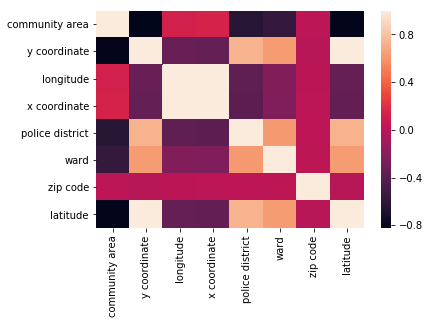

In [10]:
#double click to zoom in and scroll
corr = service_requests_df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### 311 Requests by Ward:

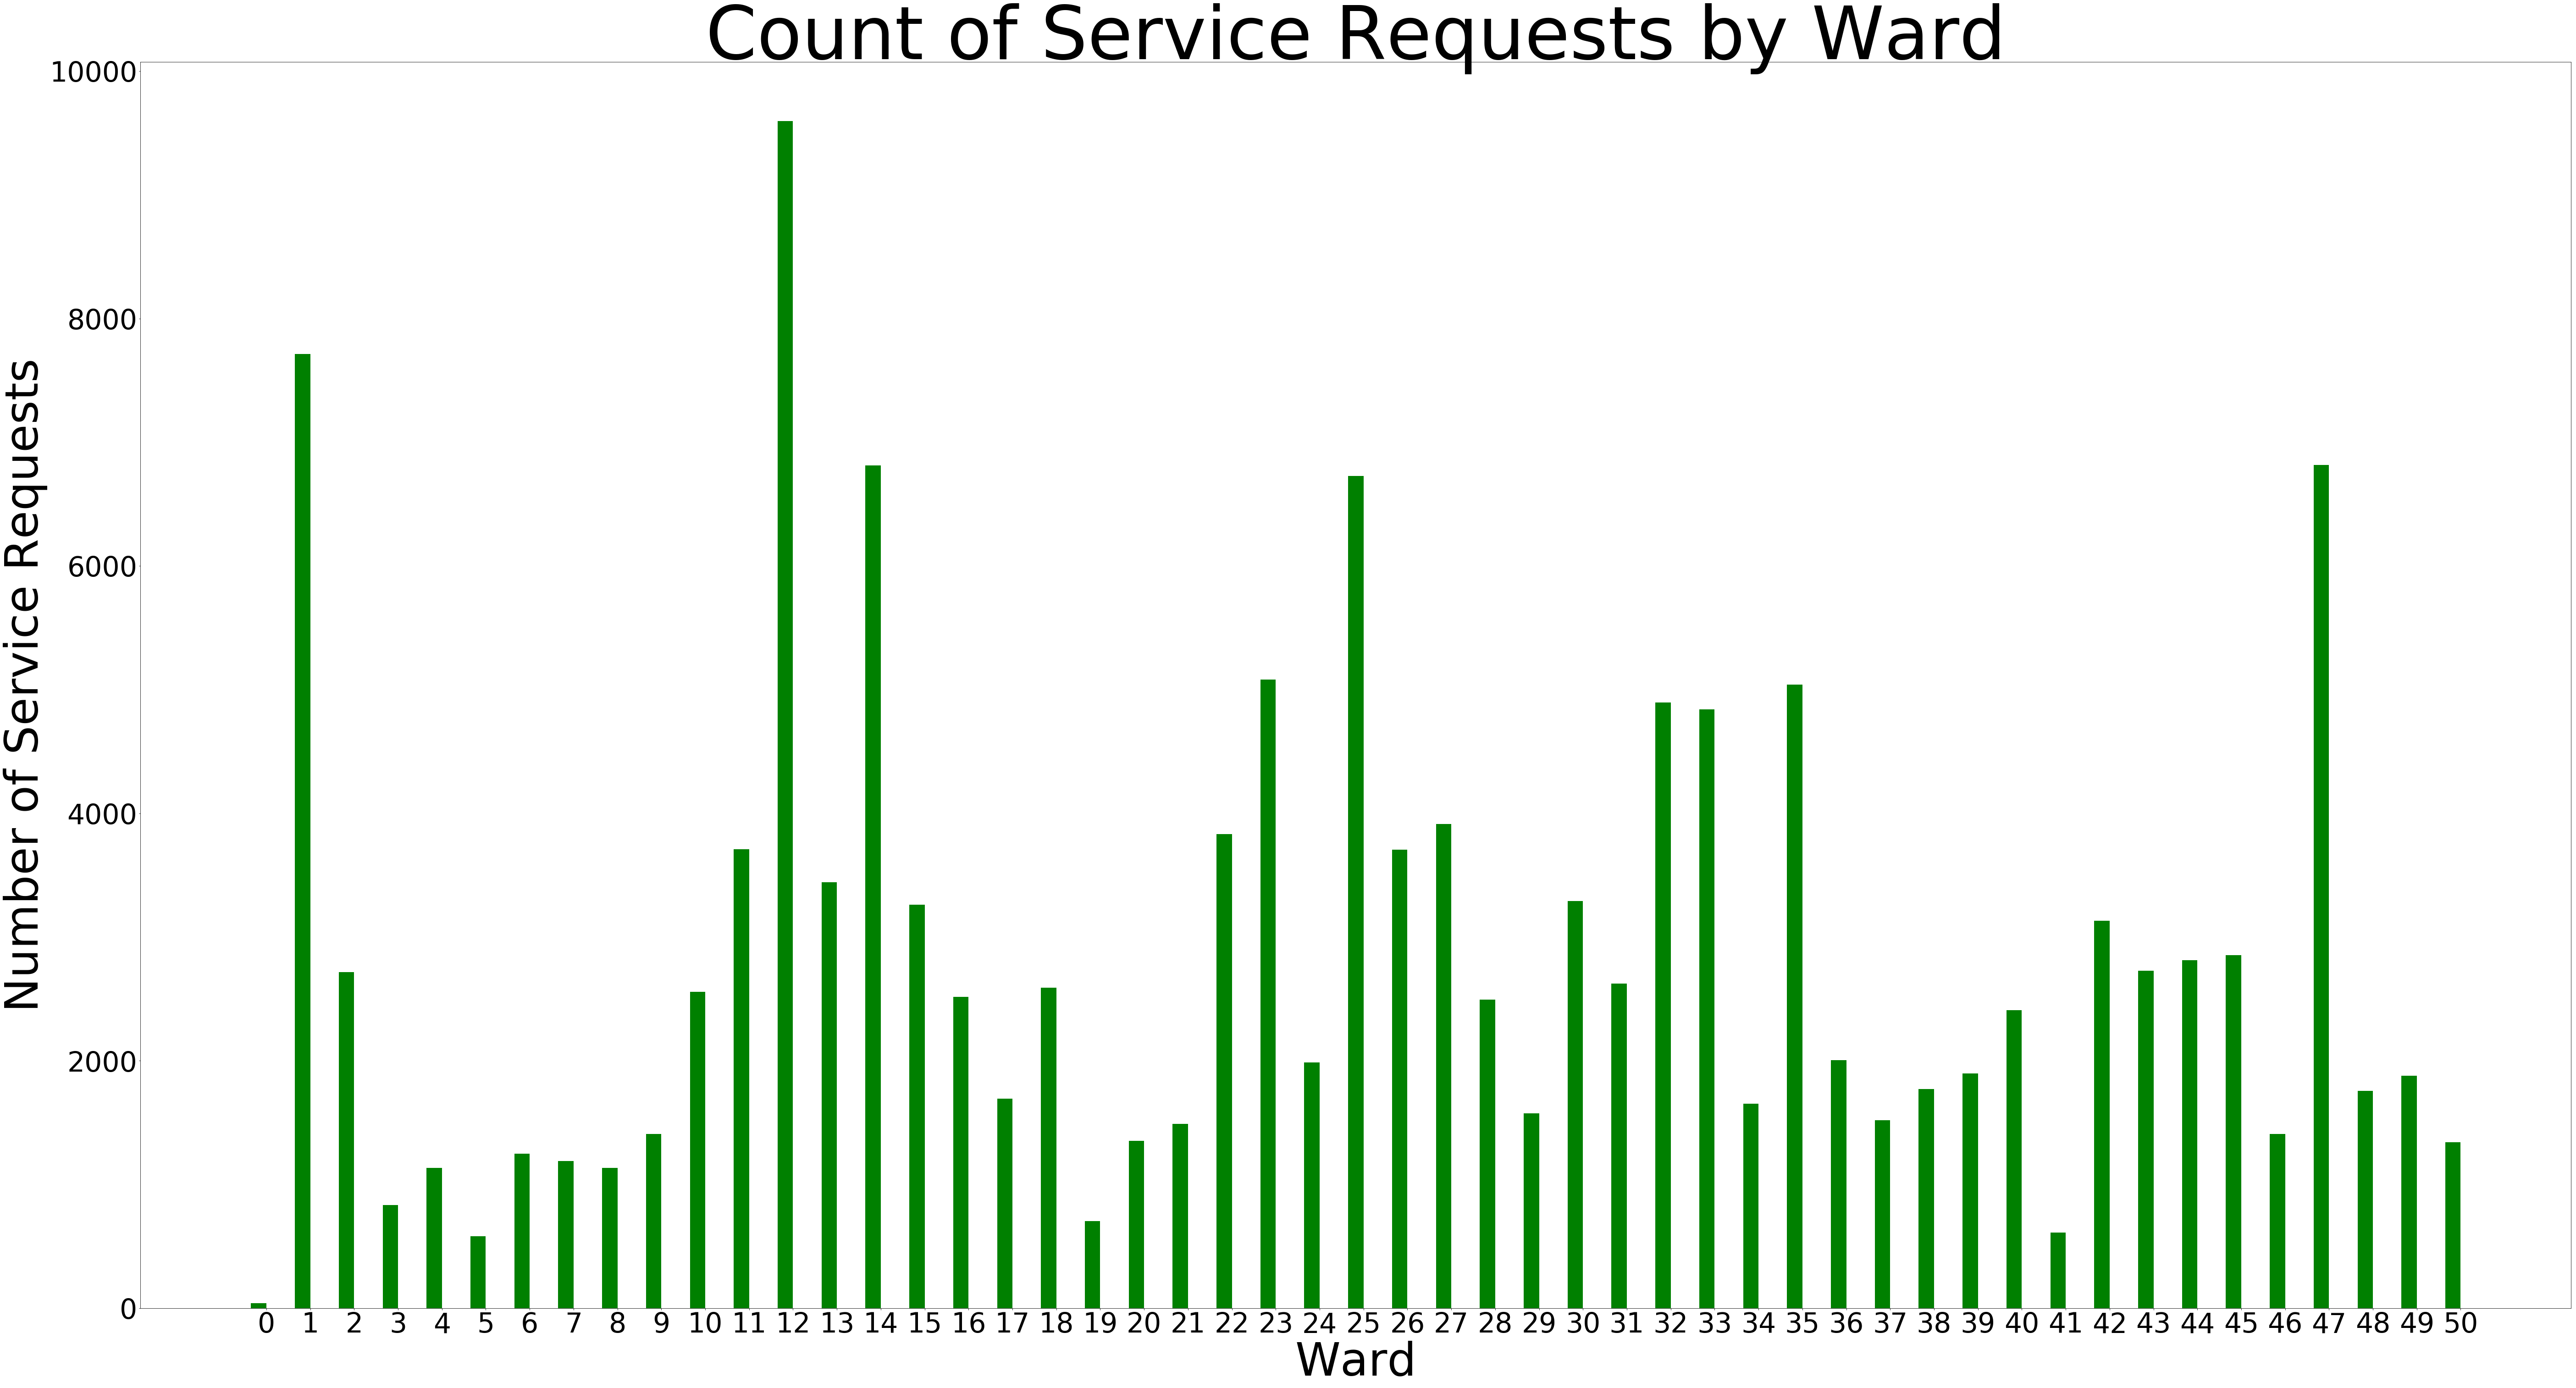

In [46]:
by_ward = service_requests_df.groupby('ward')
y_val = tuple(by_ward['service request number'].count())
x_val = range(0,51)

N = 51
counts = y_val

ind = np.arange(N)# the x locations for the groups
width = 0.35# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='g')




# add some text for labels, title and axes ticks
ax.set_ylabel('Number of Service Requests', fontsize=100)
ax.set_title('Count of Service Requests by Ward', fontsize = 160)
ax.set_xlabel('Ward', fontsize = 100)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_val)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

### 311 Requests Over Time:

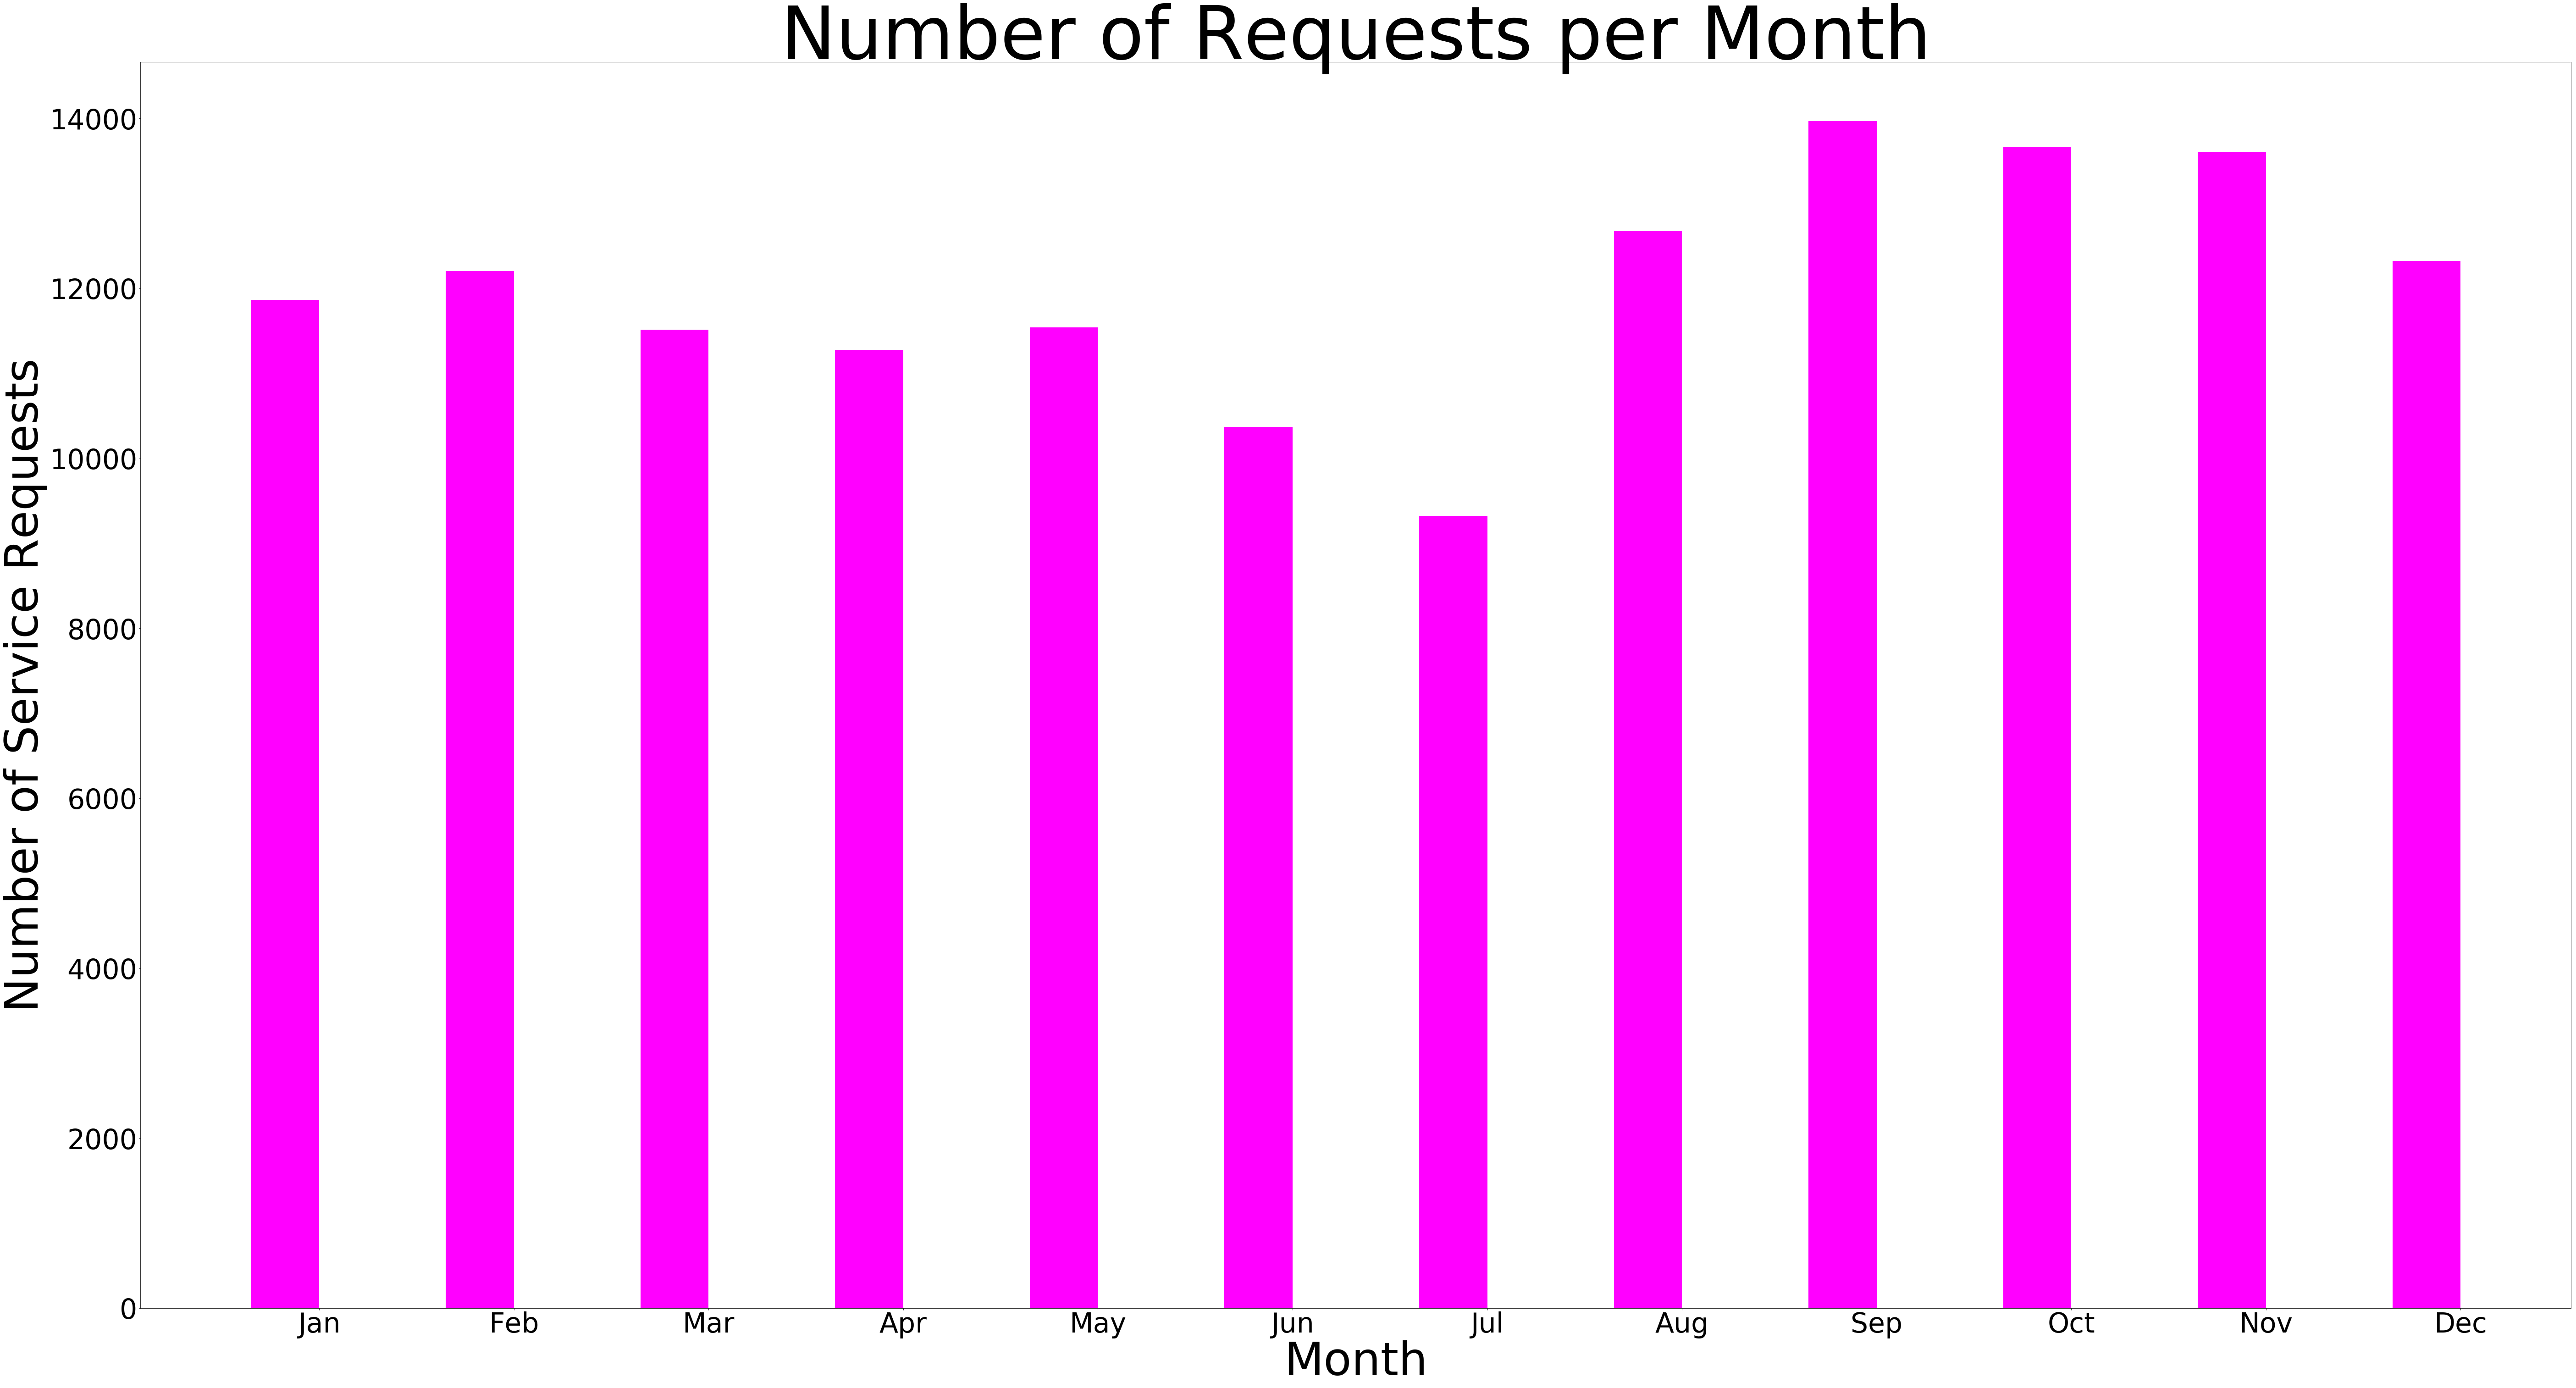

In [12]:
service = service_requests_df
service.index = service['creation date']
y_val = tuple(service.groupby(by=[service.index.month]).count()['creation date'])
x_val = ['Jan', 'Feb', 'Mar', 
         'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 
         'Oct', 'Nov', 'Dec']

N = 12
counts = y_val

ind = np.arange(N)# the x locations for the groups
width = 0.35# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='magenta')



# add some text for labels, title and axes ticks
ax.set_title('Number of Requests per Month', fontsize = 160)
ax.set_ylabel('Number of Service Requests', fontsize=100)
ax.set_xlabel('Month', fontsize = 100)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_val)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

### Alley Lights Out - completed 311 requests over time:

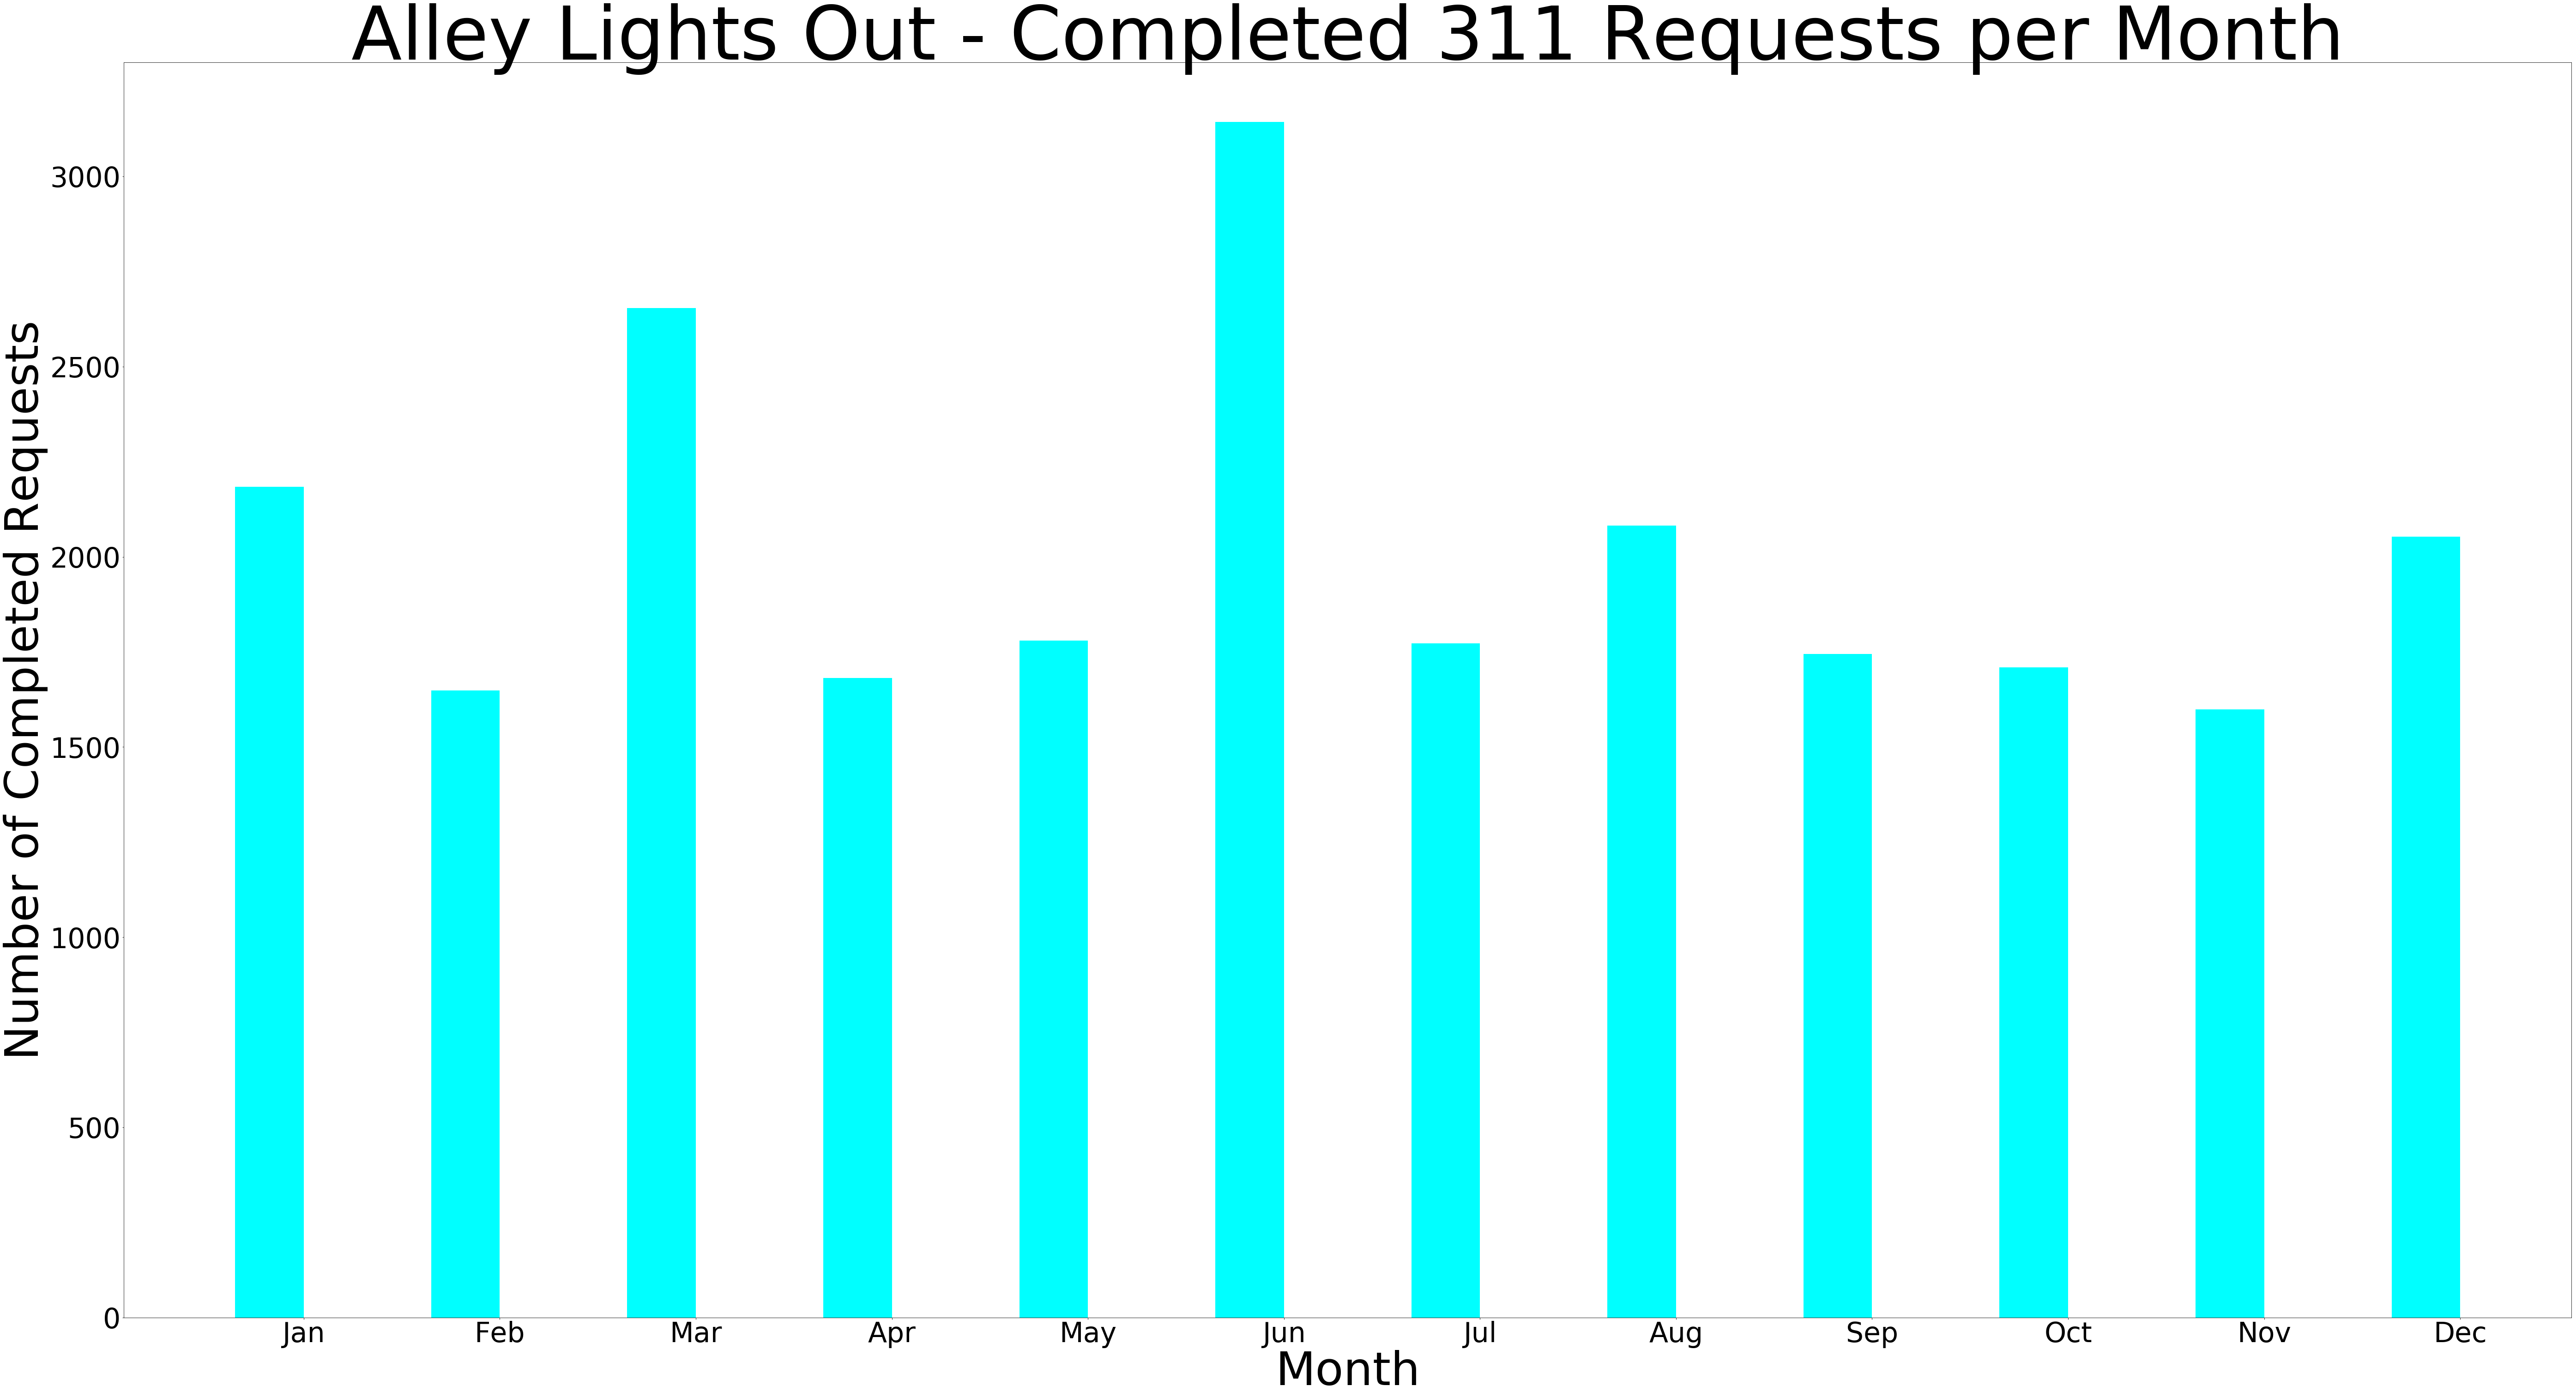

In [13]:
alley = alley_lights_df
alley.index = alley['completion date']
y_val = tuple(alley.groupby(by=[alley.index.month]).count()['completion date'])
x_val = ['Jan', 'Feb', 'Mar', 
         'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 
         'Oct', 'Nov', 'Dec']

N = 12
counts = y_val

ind = np.arange(N)# the x locations for the groups
width = 0.35# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='cyan')

# add some text for labels, title and axes ticks
ax.set_title('Alley Lights Out - Completed 311 Requests per Month', fontsize = 160)
ax.set_ylabel('Number of Completed Requests', fontsize=100)
ax.set_xlabel('Month', fontsize = 100)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_val)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

### Graffiti Removal - completed 311 requests over time:

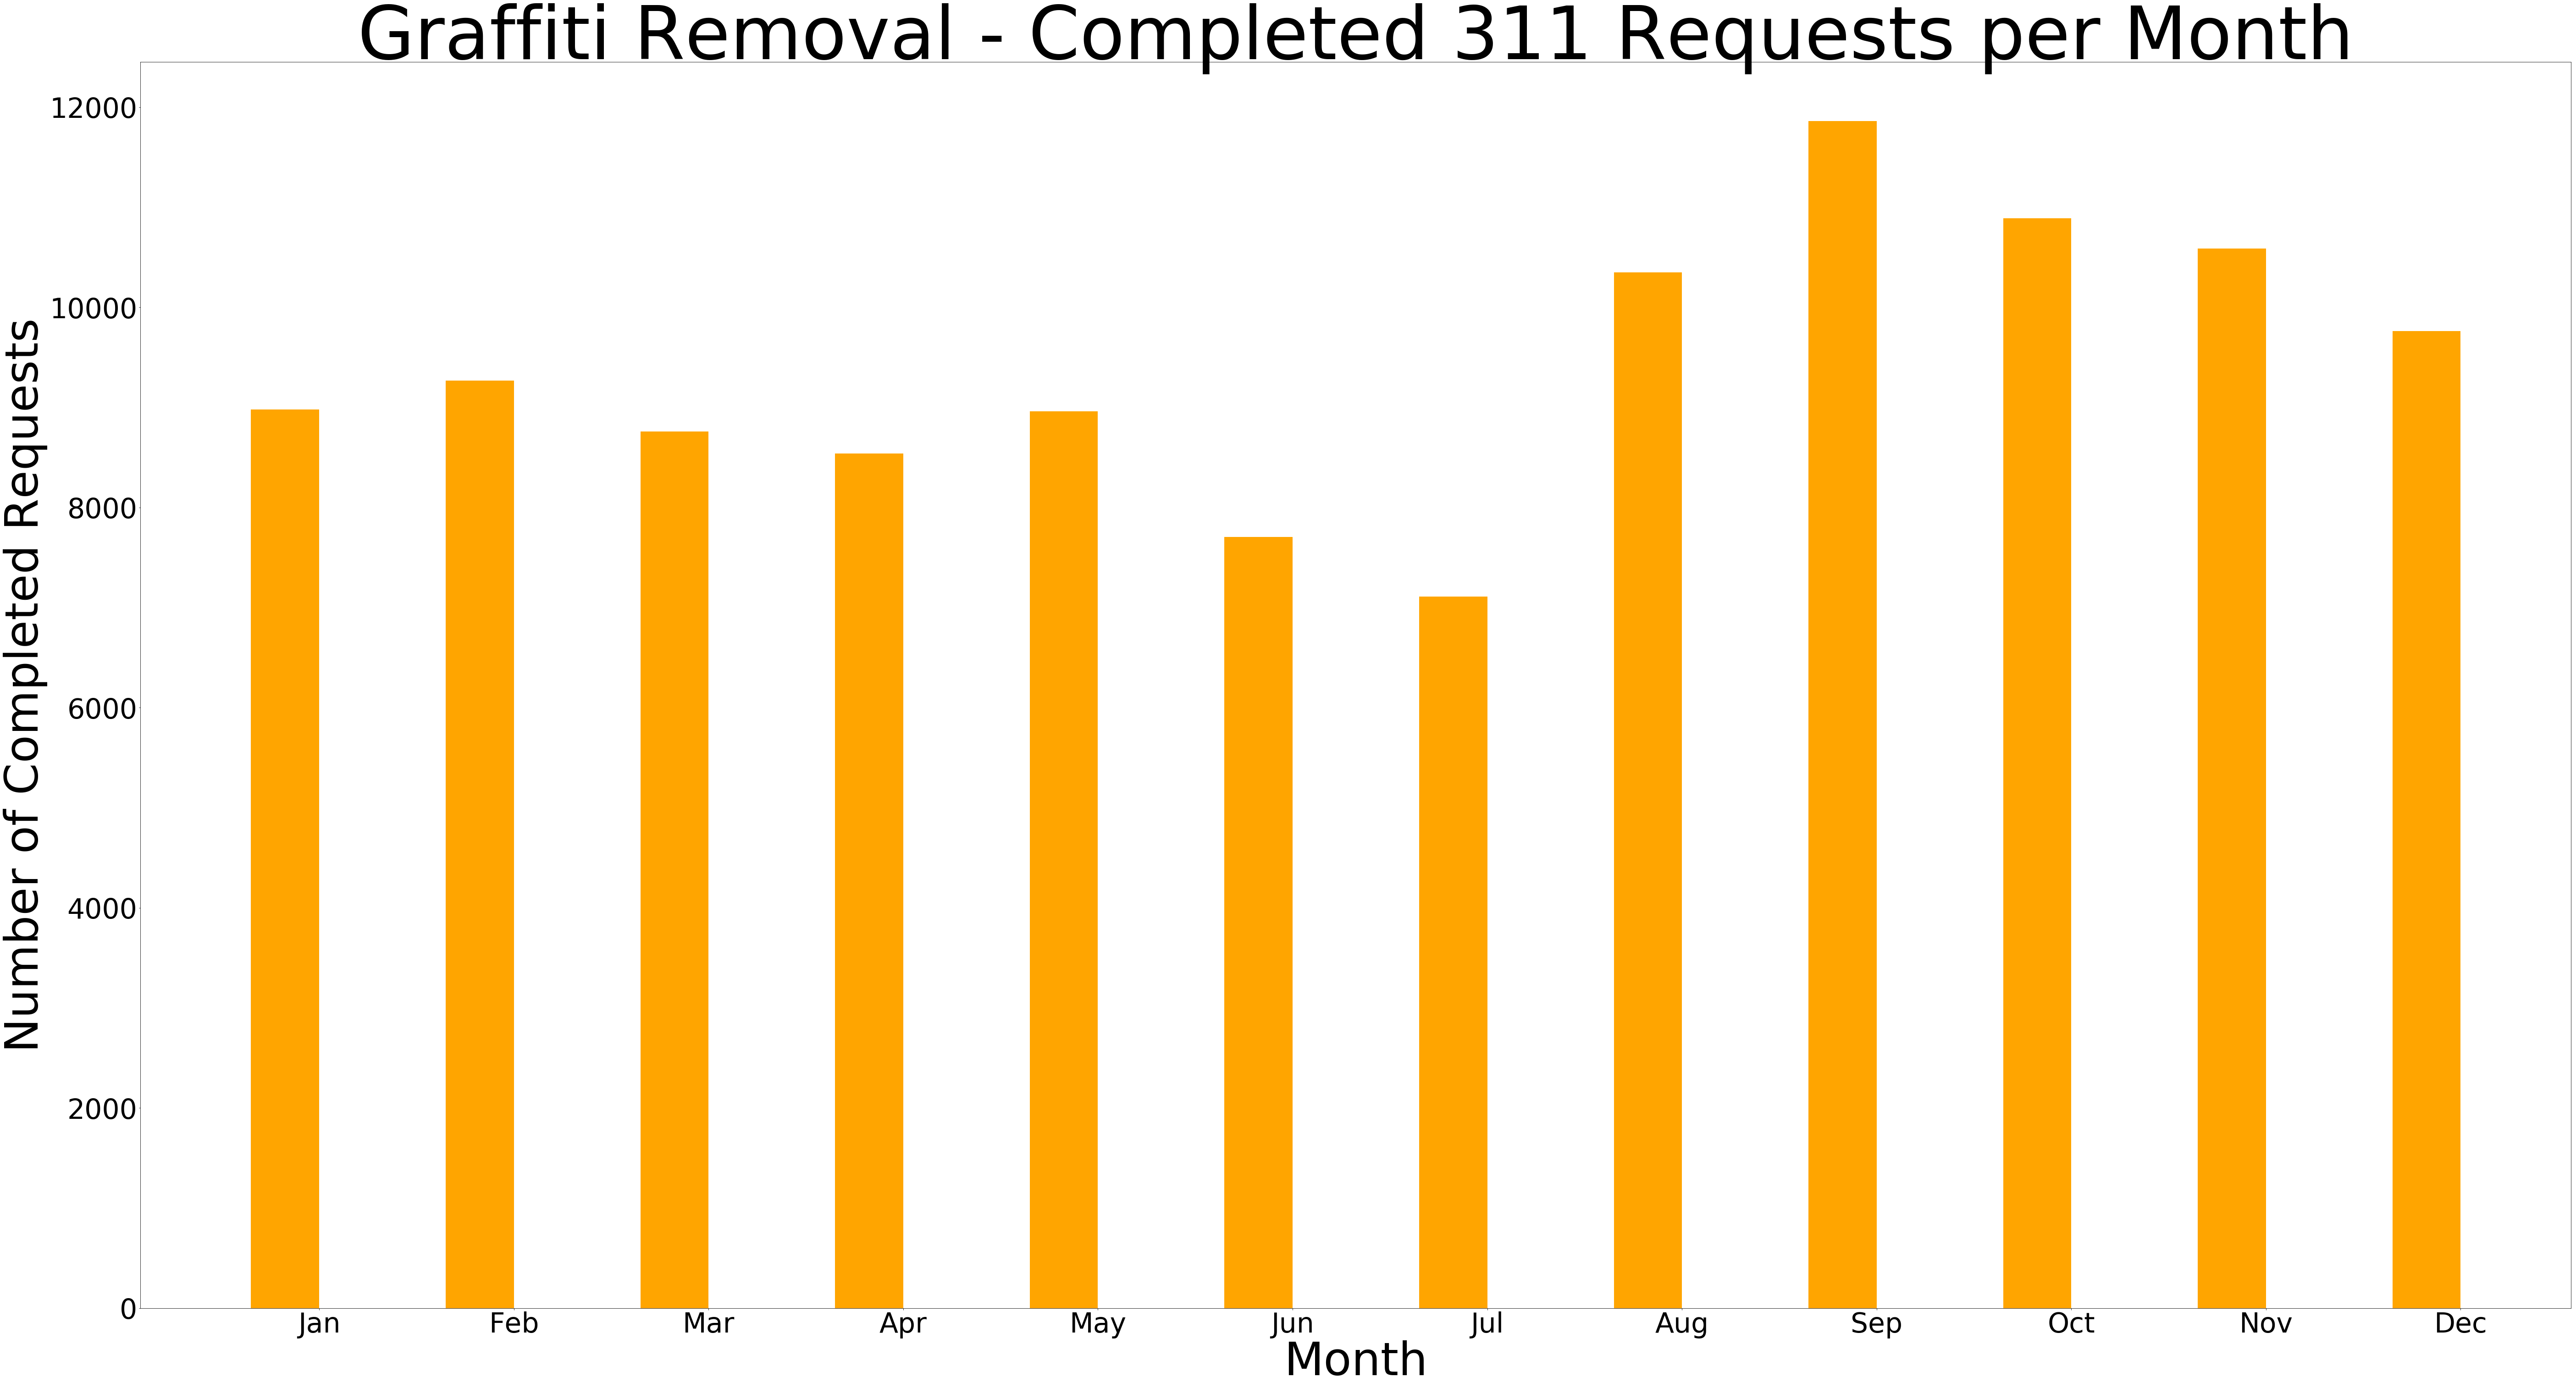

In [14]:
graffiti = graffiti_df
graffiti.index = graffiti['completion date']
y_val = tuple(graffiti.groupby(by=[graffiti.index.month]).count()['completion date'])
x_val = ['Jan', 'Feb', 'Mar', 
         'Apr', 'May', 'Jun', 
         'Jul', 'Aug', 'Sep', 
         'Oct', 'Nov', 'Dec']

N = 12
counts = y_val

ind = np.arange(N)# the x locations for the groups
width = 0.35# the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, counts, width, color='orange')

# add some text for labels, title and axes ticks
ax.set_title('Graffiti Removal - Completed 311 Requests per Month', fontsize = 160)
ax.set_ylabel('Number of Completed Requests', fontsize=100)
ax.set_xlabel('Month', fontsize = 100)
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(x_val)

rcParams['figure.figsize'] = 95, 50
plt.tick_params(labelsize=60)

plt.show()

### Reported Location of Graffiti:

In [15]:
graffiti_df.groupby(['type of service request', 
                     'where is the graffiti located?']).size()

type of service request  where is the graffiti located?       
Graffiti Removal         Alley                                     5947
                         Bench                                      745
                         Bridge                                      16
                         Concrete Pillar                             32
                         Door                                      4017
                         Door Way                                     8
                         Dumpster                                  3760
                         Express Way Job                            382
                         Express Way Job - DSS will NOT remove        1
                         Fence                                     3325
                         Front                                    32563
                         Garage                                    7991
                         Garbage Cart                              1940
 

### Graffiti Removal - Reported surface types

In [16]:
graffiti_df.groupby(['type of service request', 
                             'what type of surface is the graffiti on?']).size()

type of service request  what type of surface is the graffiti on?
Graffiti Removal         Aluminum Siding                              3045
                         Asphalt                                       102
                         Brick - Painted                             14633
                         Brick - Unpainted                           19482
                         Cement (Sidewalk, Alley, Wall, Curb)         9218
                         Glass                                        2643
                         Limestone                                     391
                         Marble/Granite                                160
                         Metal - Painted                             40329
                         Metal - Unpainted                            9962
                         Other / Unknown Surface                      2063
                         Other/Unknown Surface                        2257
                         Stucco   

# PROBLEM 2: Data Augmentation and APIs

All of the service requests you just analyzed have address and lat/long fields. The
task is to augment that data with American Community Survey data. For each
address, use one of the census APIs to get some additional data (at least 3-4 useful
variables) about the block where the 311 request came from. This could include
information about demographics of the block (race, income, family size, etc.). If you
run into API rate limit issues, just do it on “Vacant and Abandoned Buildings
Reported” and “Alley Lights Out” and for the past 3 months.
Based on this augmented data, provide some descriptive statistics to describe:
1. What types of blocks get “Vacant and Abandoned Buildings Reported”?
2. What types of blocks get “Alley Lights Out”?
3. Does that change over time in the data you collected?
4. What is the difference in blocks that get “Vacant and Abandoned Buildings Reported” vs “Alley Lights Out”?

Data from:  https://factfinder.census.gov/faces/nav/jsf/pages/searchresults.xhtml?refresh=t

### 311 Requests by Area (Using Zip Code) Classified by Race:

In [17]:
#Create a dataframe of just columns in both Alley Lights Out and Graffiti Removal
#shared_cols2 = list(acols.intersection(gcols))

#all = [alley_lights_df, graffiti_df]
#races = pd.concat(all, ignore_index = True)
#races = races[shared_cols2]

races = service_requests_df
#Added info re: race
white_df = pd.read_csv('data/ACS_16_white.csv')
white_df.columns = ['zip code', 'white pop']
races = races.merge(white_df, on = 'zip code')

black_df = pd.read_csv('data/ACS_16_black.csv')
black_df.columns = ['zip code', 'black pop']
races = races.merge(black_df, on = 'zip code')

amerind_df = pd.read_csv('data/ACS_16_americanindian_nativealaskan.csv')
amerind_df.columns = ['zip code', 'american_indian/alaskan_native pop']
races = races.merge(amerind_df, on = 'zip code')

asian_df = pd.read_csv('data/ACS_16_asian.csv')
asian_df.columns = ['zip code', 'asian pop']
races = races.merge(asian_df, on = 'zip code')

pacifisl_df = pd.read_csv('data/ACS_16_nativehawaiian_pacificislander.csv')
pacifisl_df.columns = ['zip code', 'native_hawaiian/pacific_islander pop']
races = races.merge(pacifisl_df, on = 'zip code')

mixed_df = pd.read_csv('data/ACS_16_mixed.csv')
mixed_df.columns = ['zip code', 'mixed pop']
races = races.merge(mixed_df, on = 'zip code')

In [18]:
target_columns = ['white pop', 
                  'black pop',
                  'american_indian/alaskan_native pop', 
                  'asian pop',
                  'native_hawaiian/pacific_islander pop', 
                  'mixed pop']

# Create column using the classification with the highest value for row
races['classification'] = races[target_columns].idxmax(axis=1)

In [19]:
r_sub1 = races[['type of service request', 'classification']]

In [20]:
r_sub1 = r_sub1.groupby(['type of service request'])

In [21]:
r_sub1.describe()

classification                         
                                   count unique        top   freq
type of service request                                          
Alley Light Out                    27861      4  white pop  12715
Graffiti Removal                  112714      4  white pop  93188
Vacant/Abandoned Building           3635      4  black pop   2915

In [22]:
r_sub2 = races[['type of service request', 'classification', 'creation date', 'zip code']]

In [23]:
r_sub2 = r_sub2.set_index("zip code")

In [24]:
r_sub2.groupby(['creation date'])

In [25]:
r_sub2.describe()

type of service request classification        creation date
count                   144210         144210               144210
unique                       3              4                  365
top           Graffiti Removal      white pop  2017-09-25 00:00:00
freq                    112714         106502                 1348
first                      NaN            NaN  2017-01-01 00:00:00
last                       NaN            NaN  2017-12-31 00:00:00

### PROBLEM 3:

Problem 3:

Assume you are running the 311 call center for Chicago. You get a call from 3600 W
Roosevelt Ave.
1. Of the three types of requests you have data for, which request type is the most likely given the call came from 3600 W Roosevelt Ave? What are the probabilities for each type of request?
2. Let’s now assume that a call comes in about Graffiti Removal. Which is more likely – that the call came from Garfield Park or Uptown? How much more or less likely is it to be from Garfield Park vs Uptown?
3. Now assume that you don’t have access to all the raw data and you know the following things: There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. Of the 600 calls from Garfield Park, 100 of them are about Graffiti Removal. Of the 400 calls from Uptown, 160 are about Graffiti Removal. If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Garfield Park versus Uptown?

In [26]:
'3600 W ROOSEVELT AVE' in service_requests_df['street address'].unique()

False

In [27]:
'3600 W ROOSEVELT RD' in service_requests_df['street address'].unique()

True

In [28]:
#make a new dataframe consisting of only rows which match 3600 W Roosevelt Rd 
#as the Street Address
new_df = service_requests_df.loc[service_requests_df['street address']
                                 .isin(['3600 W ROOSEVELT RD'])]
new_df.groupby('type of service request').describe()

community area                                    \
                                 count  mean std   min   25%   50%   75%   
type of service request                                                    
Graffiti Removal                   1.0  29.0 NaN  29.0  29.0  29.0  29.0   

                              latitude              ...     y coordinate  \
                          max    count       mean   ...              75%   
type of service request                             ...                    
Graffiti Removal         29.0      1.0  41.866399   ...     1.894472e+06   

                                      zip code                                 \
                                  max    count     mean std      min      25%   
type of service request                                                         
Graffiti Removal         1.894472e+06      1.0  60624.0 NaN  60624.0  60624.0   

                                                    
                             50%      75%      max  
type of service request                             
Graffiti Removal         60624.0  60624.0  60624.0  

[1 rows x 64 columns]

In [29]:
#find the zip code that matches 3600 W Roosevelt Rd
service_requests_df.loc[service_requests_df['street address'] == '3600 W ROOSEVELT RD']

community area                             location  \
creation date                                                        
2017-10-23               29.0  (41.866398891809, -87.715483678285)   

               y coordinate service request number  longitude  x coordinate  \
creation date                                                                 
2017-10-23     1.894472e+06            17-07124022 -87.715484  1.152558e+06   

              type of service request  police district  ward  \
creation date                                                  
2017-10-23           Graffiti Removal             11.0  24.0   

                    street address  zip code creation date   latitude  
creation date                                                          
2017-10-23     3600 W ROOSEVELT RD   60624.0    2017-10-23  41.866399

You can see above that the zip code that matches with 3600 W Roosevelt Road is 60624.

In [30]:
new_df = service_requests_df.loc[service_requests_df['zip code'].isin([60624.0])]
new_df.groupby('type of service request').describe()

community area                                   \
                                   count       mean       std   min   25%   
type of service request                                                     
Alley Light Out                    612.0  26.034314  1.402756  23.0  26.0   
Graffiti Removal                   311.0  26.221865  1.649723  23.0  26.0   
Vacant/Abandoned Building          146.0  25.746575  1.498559  23.0  26.0   

                                            latitude              ...     \
                            50%   75%   max    count       mean   ...      
type of service request                                           ...      
Alley Light Out            26.0  26.0  29.0    612.0  41.878893   ...      
Graffiti Removal           26.0  27.0  29.0    310.0  41.878738   ...      
Vacant/Abandoned Building  26.0  26.0  29.0    146.0  41.880296   ...      

                           y coordinate               zip code                \
                                    75%           max    count     mean  std   
type of service request                                                        
Alley Light Out            1.900637e+06  1.904695e+06    612.0  60624.0  0.0   
Graffiti Removal           1.901390e+06  1.905005e+06    311.0  60624.0  0.0   
Vacant/Abandoned Building  1.901698e+06  1.904607e+06    146.0  60624.0  0.0   

                                                                        
                               min      25%      50%      75%      max  
type of service request                                                 
Alley Light Out            60624.0  60624.0  60624.0  60624.0  60624.0  
Graffiti Removal           60624.0  60624.0  60624.0  60624.0  60624.0  
Vacant/Abandoned Building  60624.0  60624.0  60624.0  60624.0  60624.0  

[3 rows x 64 columns]

You can see from above that 'Alley Light Out' is the type highest reported zip code 60624.

In [31]:
alley = 612
graffiti = 311
vacant = 146

In [32]:
total = alley + graffiti + vacant

In [33]:
#Probability of 'Alley Light Out'
alley/total

0.5724976613657624

In [34]:
#Probability of 'Graffiti Removal'
graffiti/total

0.2909260991580917

In [35]:
#Probability of 'Vacant/Abandoned Building'
vacant/total

0.13657623947614594

Zip codes for Garfield: 60624, 60612

Zip codes for Uptown: 60613, 60640

In [36]:
#create dataframe of Garfield information
garfield = service_requests_df.loc[service_requests_df['zip code']
                                   .isin([60624.0, 60612.0])]
garfield.groupby('type of service request').describe()

community area                                   \
                                   count       mean       std   min   25%   
type of service request                                                     
Alley Light Out                    953.0  26.464848  1.494764  23.0  26.0   
Graffiti Removal                  2261.0  26.537815  1.867753  23.0  24.0   
Vacant/Abandoned Building          198.0  26.116162  1.505200  23.0  26.0   

                                            latitude              ...     \
                            50%   75%   max    count       mean   ...      
type of service request                                           ...      
Alley Light Out            26.0  27.0  29.0    953.0  41.879046   ...      
Graffiti Removal           28.0  28.0  29.0   2260.0  41.882987   ...      
Vacant/Abandoned Building  26.0  27.0  29.0    198.0  41.880062   ...      

                           y coordinate               zip code                \
                                    75%           max    count          mean   
type of service request                                                        
Alley Light Out            1.900691e+06  1.905080e+06    953.0  60619.706191   
Graffiti Removal           1.903018e+06  1.905194e+06   2261.0  60613.650597   
Vacant/Abandoned Building  1.901465e+06  1.904607e+06    198.0  60620.848485   

                                                                         \
                                std      min      25%      50%      75%   
type of service request                                                   
Alley Light Out            5.755317  60612.0  60612.0  60624.0  60624.0   
Graffiti Removal           4.134036  60612.0  60612.0  60612.0  60612.0   
Vacant/Abandoned Building  5.294118  60612.0  60612.0  60624.0  60624.0   

                                    
                               max  
type of service request             
Alley Light Out            60624.0  
Graffiti Removal           60624.0  
Vacant/Abandoned Building  60624.0  

[3 rows x 64 columns]

In [37]:
garfield_graffiti = 2261
garfield_total = 953 + 2261 + 198

In [38]:
#create a dataframe of Uptown information
uptown = service_requests_df.loc[service_requests_df['zip code'].isin([60613.0, 60640.0])]
uptown.groupby('type of service request').describe()

community area                                   \
                                   count       mean        std  min   25%   
type of service request                                                     
Alley Light Out                    371.0  17.390836  28.051127  3.0   3.0   
Graffiti Removal                  5120.0  12.457812  22.856342  3.0   3.0   
Vacant/Abandoned Building            3.0  52.333333  42.723920  3.0  40.0   

                                            latitude              ...     \
                            50%   75%   max    count       mean   ...      
type of service request                                           ...      
Alley Light Out             5.0   6.0  77.0    371.0  41.964265   ...      
Graffiti Removal            5.0   6.0  77.0   5120.0  41.962008   ...      
Vacant/Abandoned Building  77.0  77.0  77.0      3.0  41.975593   ...      

                           y coordinate               zip code                \
                                    75%           max    count          mean   
type of service request                                                        
Alley Light Out            1.933970e+06  1.937095e+06    371.0  60629.301887   
Graffiti Removal           1.932048e+06  1.937341e+06   5120.0  60625.988477   
Vacant/Abandoned Building  1.936514e+06  1.936929e+06      3.0  60640.000000   

                                                                          \
                                 std      min      25%      50%      75%   
type of service request                                                    
Alley Light Out            13.223872  60613.0  60613.0  60640.0  60640.0   
Graffiti Removal           13.491623  60613.0  60613.0  60613.0  60640.0   
Vacant/Abandoned Building   0.000000  60640.0  60640.0  60640.0  60640.0   

                                    
                               max  
type of service request             
Alley Light Out            60640.0  
Graffiti Removal           60640.0  
Vacant/Abandoned Building  60640.0  

[3 rows x 64 columns]

In [39]:
uptown_graffiti = 5120
uptown_total = 371 + 5120 + 3

In [40]:
g = garfield_graffiti/garfield_total
g

0.6626611957796014

In [41]:
u = uptown_graffiti/uptown_total
u

0.9319257371678195

You can see above that it is more likely that a 'Graffiti Removal' call came from Uptown rather than Garfield Park.

Calculate how much more likely calls will come from Uptown rather than Garfield Park:

In [42]:
u/g

1.4063381756818223

There are a total of 1000 calls, 600 from Garfield Park and 400 from Uptown. Of the 600 calls from Garfield Park, 100 of them are about Graffiti Removal. Of the 400 calls from Uptown, 160 are about Graffiti Removal. If a call comes about Graffiti Removal, how much more/less likely is it that the call came from Garfield Park versus Uptown?

In [43]:
garfield_prob = 100/600
garfield_prob

0.16666666666666666

In [44]:
uptown_prob = 160/400
uptown_prob

0.4

In [45]:
uptown_prob / garfield_prob

2.4000000000000004